# Exploratory Data Analysis

Importing the needed libraries

In [1]:
import numpy as np

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import datetime 

For reading in the files in parquet form, you might need to install the pyarrow engine from pandas

In [ ]:
#pip install -U pyarrow

Reading in the file data

In [2]:
df = pd.read_parquet('training_set_VU_DM.parquet.gzip', engine = "pyarrow")

Print out the information about the data

In [ ]:
#print (df.head(n=5))
df.info()

To start with, I will print the correlation matrix for all the variables apart from search id 

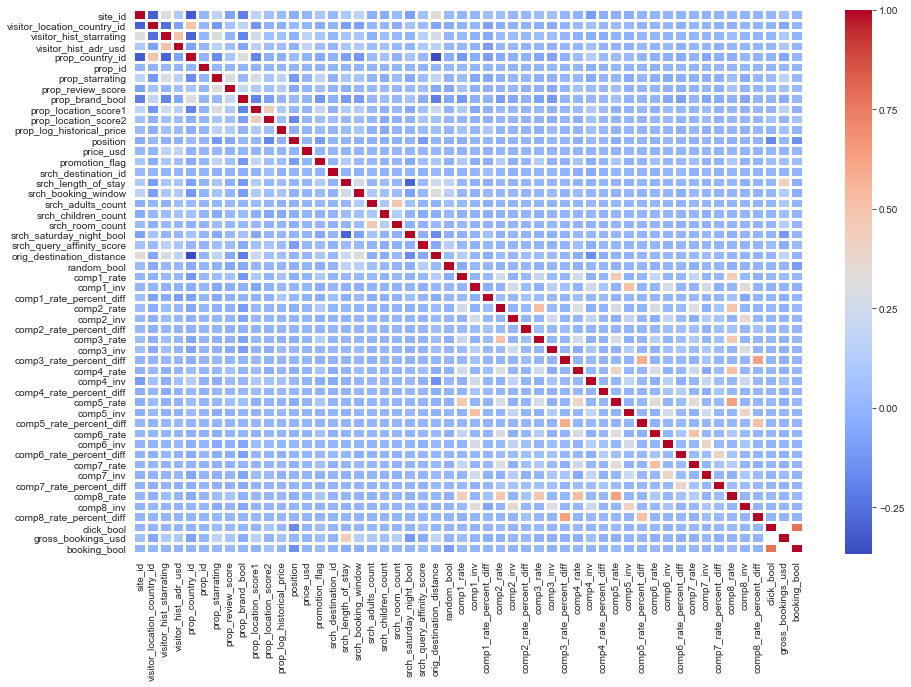

In [87]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)
new_data = df.drop(['srch_id'], axis = 1)
sns.heatmap(new_data.corr(),cmap='coolwarm',ax=ax,linewidths=2)

**Analysis of data in regards to time**

In [4]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
just_date = df.groupby([df['date_time'].dt.date]).size()
print (just_date)
print ("Mean number of obesrvations per day = " + str(just_date.mean()))
print ("Minimal number of observations per day = " + str(just_date.min()))
print ("Maximum number of observations per day = " + str(just_date.max()))

date_time
2012-11-01    18055
2012-11-02    17191
2012-11-03    11134
2012-11-04    16937
2012-11-05    18412
2012-11-06    19274
2012-11-07    18957
2012-11-08    18661
2012-11-09    16076
2012-11-10    12683
2012-11-11    15887
2012-11-12    20551
2012-11-13    18963
2012-11-14    18220
2012-11-15    18435
2012-11-16    15834
2012-11-17    12808
2012-11-18    14722
2012-11-19    17661
2012-11-20    18071
2012-11-21    16886
2012-11-22    13592
2012-11-23    13370
2012-11-24    11701
2012-11-25    16206
2012-11-26    14387
2012-11-27    19222
2012-11-28    19653
2012-11-29    17592
2012-11-30    15076
              ...  
2013-06-01    17973
2013-06-02    21752
2013-06-03    26755
2013-06-04    27274
2013-06-05    27228
2013-06-06    23586
2013-06-07    23939
2013-06-08    17940
2013-06-09    22210
2013-06-10    27656
2013-06-11    28159
2013-06-12    27900
2013-06-13    25827
2013-06-14    22208
2013-06-15    16882
2013-06-16    21411
2013-06-17    29365
2013-06-18    28465
2013-06-19

In [32]:
#Was trying to make a histogram of the months with the number of bookings but it didnt work out

booked = df[df["booking_bool"] == 1]
not_booked = df[df["booking_bool"] == 0]

date_col = booked.groupby([booked['date_time'].dt.month])#.size().to_frame(name = 'months').reset_index()
date_col = booked['date_time'].dt.month

not_booked_date = not_booked.groupby([not_booked['date_time'].dt.month])#.size().to_frame(name = 'months').reset_index()
not_booked_date = not_booked['date_time'].dt.month


#not_booked_date = not_booked_date.to_frame()
print (date_col.value_counts())
print (not_booked_date.value_counts())


#df['Column_Name'].value_counts()

#print(len(date_col))
# date_col.columns = ['date']
# hist = date_col.hist(bins = 8, figsize=(10,8))
#plt.hist(x = date_col, bins = 12, color = 'g')
#plt.hist(x = not_booked_date, bins = 12, color = 'b')
#plt.title("Number of bookings made in each month")
#plt.xlabel("Months")
#plt.ylabel("Number of bookings")
# #plt.xticks(['1','2','3', '4', '5' , '6' , '7','8','9','10','11','12'])
#plt.show

#print (date_col)
#x = date_col.groupby([date_col['date_time'].dt.date])

# res = df.groupby(pd.Grouper(freq='M'))
# print(res.sum())
# date_bookings  = df.groupby([booked['date_time'].dt.month])["booking_bool"].sum()
# ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
# ax1.set_xticks(range(len(date_bookings)))
# xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

6     21108
5     20078
3     19426
4     17952
2     16473
1     16011
11    13971
12    13371
Name: date_time, dtype: int64
6     716283
3     681450
5     679698
4     624925
1     591567
2     577420
11    482246
12    466368
Name: date_time, dtype: int64


**Starring analysis** - printing the box plot analysis for stars given for both the costumers and for the hotels

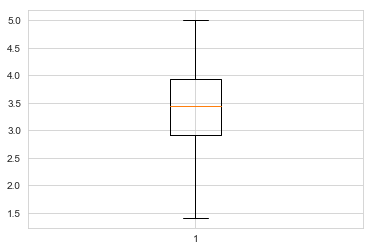

Mean average of the costumers' star rating = 3.374334050646105
1.41
5.0


 ---------------- 




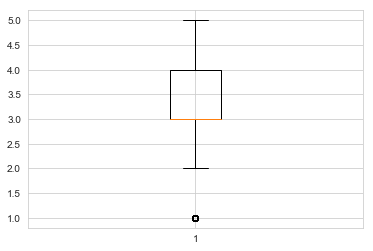

Mean average of the hotels' star rating = 3.2931488741901633
1
5


In [21]:
# Cusotmer Starring 
vis_stars = df['visitor_hist_starrating']
vis_stars.dropna(inplace=True)
#print("Number of not NaN values = " + str(vis_stars.count()))
#print (vis_stars.head)

plt.boxplot(vis_stars)
plt.show()

print("Mean average of the costumers' star rating = " + str(vis_stars.mean()))
print(vis_stars.min())
print(vis_stars.max())

print("\n\n ---------------- \n\n")

# Hotels starring
#prop_stars = df['prop_starrating']
#prop_stars.dropna(inplace=True)
#prop_stars = prop_stars.to_frame()
prop_stars = df[df["prop_starrating"] != 0]
prop_stars = prop_stars['prop_starrating']

plt.boxplot(prop_stars)
plt.show()

print("Mean average of the hotels' star rating = " + str(prop_stars.mean()))
print(prop_stars.min())
print(prop_stars.max())

**Hotel Analysis**

In [ ]:
hotels_id = df['prop_id'].nunique()
print (hotels_id)

countries = df['prop_country_id'].nunique()
print (countries)

**There is a booking_bool part in the original data which I cannot find the explanation for in the documentation but I am going to assume that it's if the booking was made or not**


**Analysis of bookings**

In [ ]:
# Search ended up with booking a hotel
booked = df[df["booking_bool"] == 1]
#print (booked.head)

# Histogram of countried to which people travel to most
hist= booked.hist(column ='prop_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)

# countries =  booked.groupby(['prop_country_id'])
# print (countries.size().max)

In [ ]:
# Search ended with not booking
not_booked = df[df["booking_bool"] == 0]

#histogram of countried that people search for most 
hist= not_booked.hist(column ='prop_country_id', bins = 172, figsize=(15,10), xlabelsize = 20)

# countries =  not_booked.groupby(['prop_country_id'])
# print (countries.size().max())

In [ ]:
# Plot number of hotels per country

hist_data = df[['prop_id', 'prop_country_id']].copy()
#print(hist_data.head())

hist_data.drop_duplicates(subset = 'prop_id',keep='first', inplace=True)
#print (hist_data)

hist = hist_data.hist(column ='prop_country_id', bins = 172, figsize=(15,10))
#print (hist_data.groupby('prop_country_id').count()) #print number of hotels per country